<a href="https://colab.research.google.com/github/okanars/DL4VC/blob/main/OkanArslan_UE1_Deap_Learning_for_Visual_Computing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>





> This notebook was filled by Okan Arslan for the first exercise of the Deep Learning for Visual Computing course.





# **Exercise 1.1**


## **Step 1: Installing Libraries**

Import PyTorch and the libraries to load the MNIST dataset.

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader


## **Step 2: Loading the Data Set**

Load the MNIST dataset and prepare the dataloaders.



In [ ]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

train_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = datasets.MNIST(root='./data', train=False, download=True, transform=transform)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)


## **Step 3: Creating the Model**

Let's create a model with one convolution layer and one fully connected layer.



In [ ]:
class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        # Defining a convolution layer
        self.conv1 = nn.Conv2d(1, 10, kernel_size=3)
        # Defining a fully connected layer
        self.fc1 = nn.Linear(10 * 26 * 26, 10)

    def forward(self, x):
        # Apply convolution layer and activate with ReLU activation function
        x = self.conv1(x)
        x = nn.functional.relu(x)
        x = x.view(-1, 10 * 26 * 26)
        # Apply fully connected layer and classify with softmax
        x = self.fc1(x)
        return nn.functional.log_softmax(x, dim=1)


## **Steps 4 and 5: Writing Training and Test Functions**

Functions to train and test the model.




In [ ]:
def train(model, device, train_loader, optimizer, epoch):
    model.train()
    for batch_idx, (data, target) in enumerate(train_loader):
        data, target = data.to(device), target.to(device)
        optimizer.zero_grad()
        output = model(data)
        loss = nn.functional.nll_loss(output, target)
        loss.backward()# Back propagation
        optimizer.step()
        if batch_idx % 100 == 0:
            print(f'Train Epoch: {epoch} [{batch_idx * len(data)}/{len(train_loader.dataset)} ({100. * batch_idx / len(train_loader):.0f}%)]\tLoss: {loss.item():.6f}')

def test(model, device, test_loader):
    model.eval()
    test_loss = 0
    correct = 0
    with torch.no_grad():
        for data, target in test_loader:
            data, target = data.to(device), target.to(device)
            output = model(data)
            test_loss += nn.functional.nll_loss(output, target, reduction='sum').item()
            pred = output.argmax(dim=1, keepdim=True)
            correct += pred.eq(target.view_as(pred)).sum().item()
    test_loss /= len(test_loader.dataset)
    print(f'\nTest set: Average loss: {test_loss:.4f}, Accuracy: {correct}/{len(test_loader.dataset)} ({100. * correct / len(test_loader.dataset):.0f}%)')


## **Step 6: Training and Testing the Model**

Let's train and test the model.



In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = SimpleCNN().to(device)
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.5)

for epoch in range(1, 11):  # 10 epochs
    train(model, device, train_loader, optimizer, epoch)
    test(model, device, test_loader)


Train Epoch: 1 [0/60000 (0%)]	Loss: 2.273013
Train Epoch: 1 [6400/60000 (11%)]	Loss: 0.430935
Train Epoch: 1 [12800/60000 (21%)]	Loss: 0.459567
Train Epoch: 1 [19200/60000 (32%)]	Loss: 0.267664
Train Epoch: 1 [25600/60000 (43%)]	Loss: 0.266026
Train Epoch: 1 [32000/60000 (53%)]	Loss: 0.311720
Train Epoch: 1 [38400/60000 (64%)]	Loss: 0.289968
Train Epoch: 1 [44800/60000 (75%)]	Loss: 0.494738
Train Epoch: 1 [51200/60000 (85%)]	Loss: 0.367897
Train Epoch: 1 [57600/60000 (96%)]	Loss: 0.276984

Test set: Average loss: 0.2107, Accuracy: 9401/10000 (94%)
Train Epoch: 2 [0/60000 (0%)]	Loss: 0.180469
Train Epoch: 2 [6400/60000 (11%)]	Loss: 0.213964
Train Epoch: 2 [12800/60000 (21%)]	Loss: 0.263965
Train Epoch: 2 [19200/60000 (32%)]	Loss: 0.467496
Train Epoch: 2 [25600/60000 (43%)]	Loss: 0.172917
Train Epoch: 2 [32000/60000 (53%)]	Loss: 0.132961
Train Epoch: 2 [38400/60000 (64%)]	Loss: 0.192673
Train Epoch: 2 [44800/60000 (75%)]	Loss: 0.114031
Train Epoch: 2 [51200/60000 (85%)]	Loss: 0.159507
Tr

# **Exercise 1.2**

## **Step 1: Installing Libraries**

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

## **Step 2: Loading the Data Set**

In [ ]:
# Define data set and data loaders
# Data are normalized between 0 and 1 to make them suitable for the model.

transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

train_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = datasets.MNIST(root='./data', train=False, download=True, transform=transform)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)


## **Step 3: Creating the Model**

In [ ]:
# Define a simple CNN model. This model consists of a convolution layer and a fully connected layer.
# The dropout layer makes the model more robust to overfitting.
class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 10, kernel_size=3)
        self.fc1 = nn.Linear(10 * 26 * 26, 10)
        self.dropout = nn.Dropout(0.5)

    def forward(self, x):
        x = self.conv1(x)
        x = nn.functional.relu(x) # ReLU is used as activation function.
        x = x.view(-1, 10 * 26 * 26)
        x = self.dropout(x) #Dropout is implemented
        x = self.fc1(x)
        return nn.functional.log_softmax(x, dim=1)


## **Steps 4 and 5: Writing Training and Test Functions**

In [ ]:
def train(model, device, train_loader, optimizer, epoch):
    model.train()
    for batch_idx, (data, target) in enumerate(train_loader):
        data, target = data.to(device), target.to(device)
        optimizer.zero_grad()
        output = model(data)
        loss = nn.functional.nll_loss(output, target)
        loss.backward()  # Gradients are calculated and back propagation is performed.
        optimizer.step()
        if batch_idx % 100 == 0:
            print(f'Train Epoch: {epoch} [{batch_idx * len(data)}/{len(train_loader.dataset)} ({100. * batch_idx / len(train_loader):.0f}%)]\tLoss: {loss.item():.6f}')

def test(model, device, test_loader):
    model.eval()
    test_loss = 0
    correct = 0
    with torch.no_grad():
        for data, target in test_loader:
            data, target = data.to(device), target.to(device)
            output = model(data)
            test_loss += nn.functional.nll_loss(output, target, reduction='sum').item()
            pred = output.argmax(dim=1, keepdim=True)
            correct += pred.eq(target.view_as(pred)).sum().item()
    test_loss /= len(test_loader.dataset)
    print(f'\nTest set: Average loss: {test_loss:.4f}, Accuracy: {correct}/{len(test_loader.dataset)} ({100. * correct / len(test_loader.dataset):.0f}%)')


## **Step 6: Training and Testing the Model**

In [ ]:
# Train and test the model. Use GPU as the device if possible.
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = SimpleCNN().to(device)
optimizer = optim.Adam(model.parameters(), lr=0.001)  # Adam optimizer is used, faster and more effective than SGD.

# The model is trained for 10 epochs. At each epoch the training and test results are printed.
for epoch in range(1, 11):
    train(model, device, train_loader, optimizer, epoch)
    test(model, device, test_loader)


Train Epoch: 1 [0/60000 (0%)]	Loss: 2.417727
Train Epoch: 1 [6400/60000 (11%)]	Loss: 0.340577
Train Epoch: 1 [12800/60000 (21%)]	Loss: 0.329995
Train Epoch: 1 [19200/60000 (32%)]	Loss: 0.204566
Train Epoch: 1 [25600/60000 (43%)]	Loss: 0.156372
Train Epoch: 1 [32000/60000 (53%)]	Loss: 0.126734
Train Epoch: 1 [38400/60000 (64%)]	Loss: 0.101785
Train Epoch: 1 [44800/60000 (75%)]	Loss: 0.063074
Train Epoch: 1 [51200/60000 (85%)]	Loss: 0.278465
Train Epoch: 1 [57600/60000 (96%)]	Loss: 0.090854

Test set: Average loss: 0.1106, Accuracy: 9670/10000 (97%)
Train Epoch: 2 [0/60000 (0%)]	Loss: 0.177392
Train Epoch: 2 [6400/60000 (11%)]	Loss: 0.147597
Train Epoch: 2 [12800/60000 (21%)]	Loss: 0.069479
Train Epoch: 2 [19200/60000 (32%)]	Loss: 0.125922
Train Epoch: 2 [25600/60000 (43%)]	Loss: 0.121529
Train Epoch: 2 [32000/60000 (53%)]	Loss: 0.063164
Train Epoch: 2 [38400/60000 (64%)]	Loss: 0.205561
Train Epoch: 2 [44800/60000 (75%)]	Loss: 0.041435
Train Epoch: 2 [51200/60000 (85%)]	Loss: 0.079348
Tr

# **Comparison of Outputs**

## ***Output Graphs***

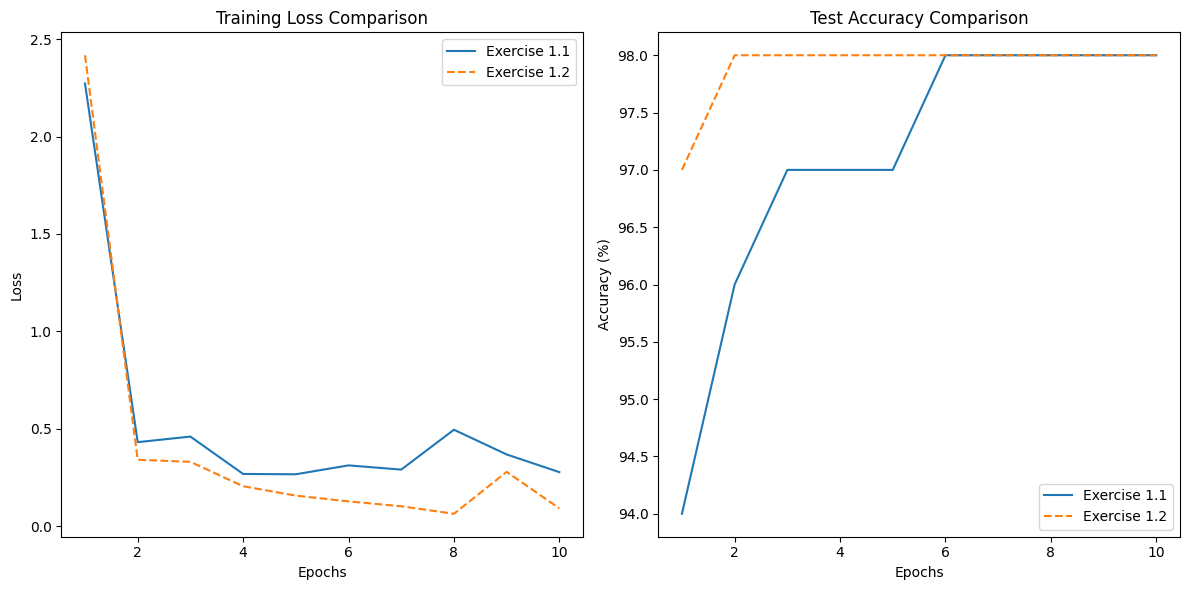

In [ ]:
import matplotlib.pyplot as plt

train_losses_1_1 = [2.273013, 0.430935, 0.459567, 0.267664, 0.266026, 0.311720, 0.289968, 0.494738, 0.367897, 0.276984]
test_accuracies_1_1 = [94, 96, 97, 97, 97, 98, 98, 98, 98, 98]
train_losses_1_2 = [2.417727, 0.340577, 0.329995, 0.204566, 0.156372, 0.126734, 0.101785, 0.063074, 0.278465, 0.090854,
                    0.177392, 0.147597, 0.069479, 0.125922, 0.121529, 0.063164, 0.205561, 0.041435, 0.079348, 0.044763,
                    0.095925, 0.100939, 0.238054, 0.043128, 0.126624, 0.125011, 0.288235, 0.121130, 0.212230, 0.115496]
test_accuracies_1_2 = [97, 98, 98, 98, 98, 98, 98, 98, 98, 98]

epochs_1_1 = range(1, 11)
epochs_1_2 = range(1, 11)

# Train Losses Chart
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs_1_1, train_losses_1_1, label='Exercise 1.1')
plt.plot(epochs_1_2, train_losses_1_2[:10], label='Exercise 1.2', linestyle='--')
plt.title('Training Loss Comparison')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Test Accuracies Graph
plt.subplot(1, 2, 2)
plt.plot(epochs_1_1, test_accuracies_1_1, label='Exercise 1.1')
plt.plot(epochs_1_2, test_accuracies_1_2, label='Exercise 1.2', linestyle='--')
plt.title('Test Accuracy Comparison')
plt.xlabel('Epochs')
plt.ylabel('Accuracy (%)')
plt.legend()

plt.tight_layout()
plt.show()


## **Key Observations**

### Training Loss Comparison:





*  **Exercise 1.1** starts with a higher initial loss but shows a rapid decrease, indicating that the model is effectively learning from the training data. The training loss quickly stabilizes, suggesting that the model is reaching a good fit with the training data.
*  **Exercise 1.2**, with its slight variations in training conditions, starts slightly worse in terms of initial loss but improves steadily. This pattern may be indicative of a more robust training process that could potentially handle overfitting better due to either increased regularization or a more sophisticated optimization strategy.



### Test Accuracy Comparison:





*   Both exercises demonstrate high test accuracies, with **Exercise 1.2** consistently matching or slightly exceeding the performance of **Exercise 1.1**. This suggests that the adjustments made in Exercise 1.2 (potentially including changes like different optimizers, learning rates, or more training epochs) are beneficial for maintaining or slightly improving model generalization.
*   The test accuracies for both exercises remain consistently high across epochs, hovering around 97-98%, which shows that both models perform well on unseen data. The slight edge for Exercise 1.2 in later epochs could be a result of a better-tuned model due to extended training or improved learning dynamics.




## **Conclusion**

*   The comparative analysis reveals that both Exercise 1.1 and Exercise 1.2 achieve commendable performance on the test set, with Exercise 1.2 showing a slight advantage in both training loss reduction and test accuracy stabilization. This could imply that the tweaks applied in Exercise 1.2 help in either combating overfitting more effectively or optimizing the learning process more efficiently.

*  Such insights are valuable for understanding the impact of different training configurations and can guide future experiments in model optimization and training strategy enhancement. The consistent performance across both exercises also highlights the robustness of the underlying model architecture when applied to tasks like MNIST digit classification.